# Interpolation

It is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points.

For example, we have $x=(2,4)$ and $y=(5,7)$. A plot of these two points looks like this:

In [1]:
# SET UP
using Pkg; Pkg.activate("C:/Users/nicot/GitHub/Tutorial_DynMacro")
using Plots; using Interpolations
gr(fmt=:png);
Pkg.status()

  Activating environment at `C:\Users\nicot\GitHub\Tutorial_DynMacro\Project.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


      Status `D:\GitHub\Tutorial_DynMacro\Project.toml`
  [31c24e10] Distributions v0.23.11
  [2774e3e8] NLsolve v4.5.1
  [429524aa] Optim v1.4.1
  [fcd29c91] QuantEcon v0.16.2


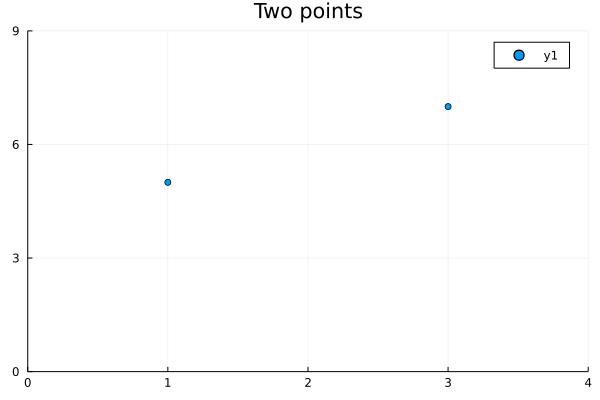

In [2]:
x=1:2:3 # x is a range
y=[5, 7]  # y is a column vector
scatter(x, y,
    title = "Two points",
    xlims = (0,4) , ylims = (0,9)
)

lin(1.5) = 5.5
lin(2) = 6.0
lin(2.5) = 6.5


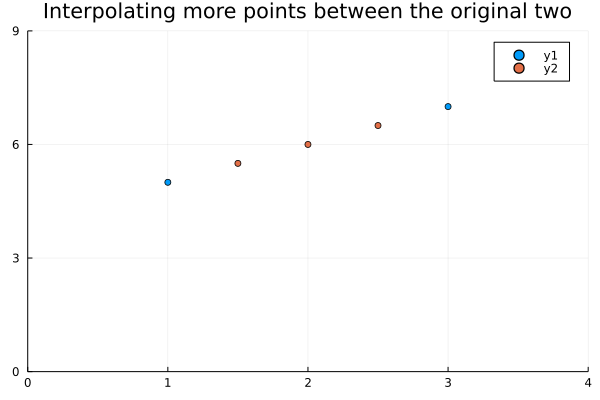

In [3]:
lin = LinearInterpolation(x, y)

@show lin(1.5)
@show lin(2)
@show lin(2.5)

xx=1.5:0.5:2.5
scatter(x,y,
    title = "Interpolating more points between the original two",
    xlims = (0,4) , ylims = (0,9)
)
scatter!(xx,lin.(xx))

Now, let's create some points using a $sin$ function at $x=(0 \; 1 \; 2 \; 3 \; 4 \; 5 \; 6)$.
Suppose we then forget how those points were created, however we want to aproximate the value of the underlying function at values $x'=(0.5 \; 1.5 \; 2.5 \; 3.5 \; 4.5 \; 5.5 \; 6.5)$.

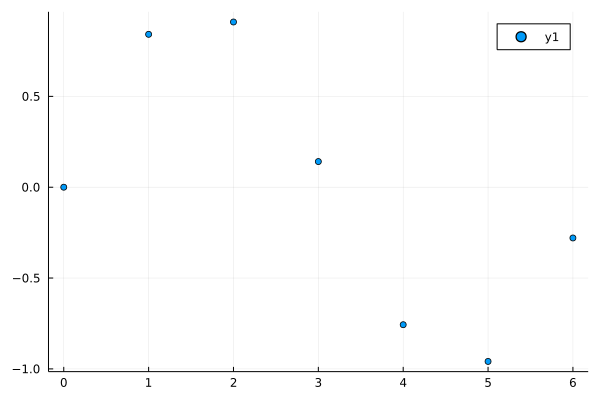

In [4]:
x=0:6
y=sin.(x)
scatter(x,y)

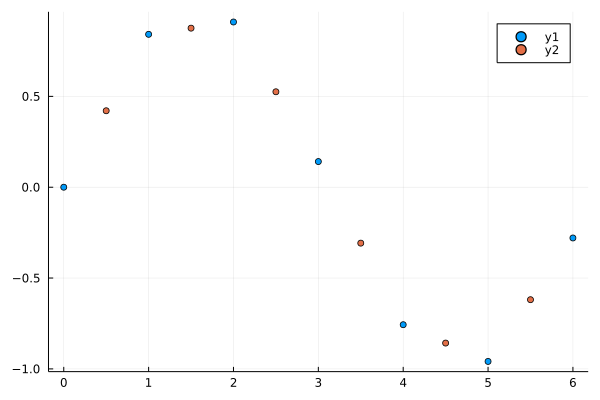

In [5]:
lin=LinearInterpolation(x,y)
xx=0.5:5.5
scatter(x,y)
scatter!(xx,lin.(xx))

In this example, (first degree) linear interpolation is just connecting dots.
Basically what Julia does when we ask for a common plot instead of an scatterplot.

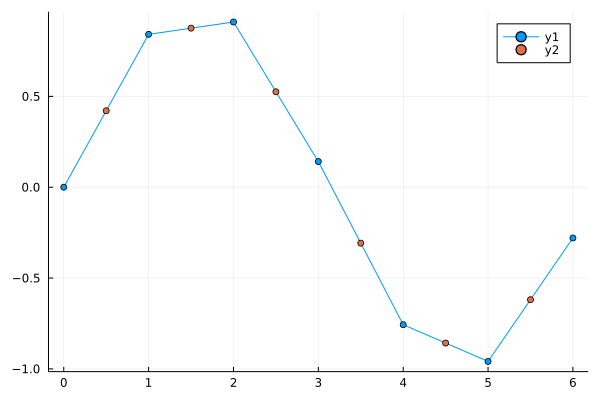

In [6]:
plot(x,y,markershape = :circle)
scatter!(xx,lin.(xx))

We can also use a quadratic or cubic interpolation, let's see:

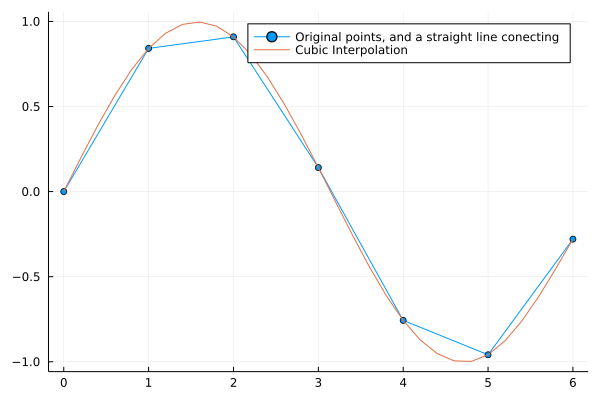

In [7]:
quad=CubicSplineInterpolation(x,y)
#CubicSplineInterpolation
x_grid=0:0.2:6
plot(x,y,markershape = :circle,label="Original points, and a straight line conecting")
plot!(x_grid,quad.(x_grid),label="Cubic Interpolation")
#scatter!(xx,lin.(xx))

We can interpolate also in the space (not only in the plane).

In [8]:
f(x,y) = x^2-y^2
xs=-1:0.4:1 # x is a range
ys=-1:0.4:1 # y is a range
zs = [f(x,y) for x in xs, y in ys] # z is a matrix

# linear interpolation
lin2 = LinearInterpolation((xs, ys), zs);

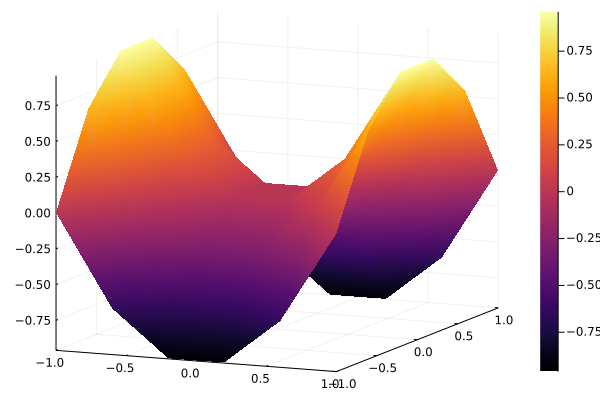

In [9]:
x_grid=-1:0.1:1
y_grid=-1:0.1:1
Lin2(xv,yv)=lin2(xv,yv)# lin2 is an interpolation, but Lin2 is a function. 
surface(x_grid,y_grid,Lin2) # We can use functions as arguments for plotting surfaces

### What happen outside the boundries?

Let's go back to the example of data generated by a sin function valued at $x=(0 \; 1 \; 2 \; 3 \; 4 \; 5 \; 6)$.
And imagine that we want to aproximate the value at $x=-1$ or $x=7$.
In this case, it is not interpolation what we want it is extrapolation, despite the difference in the names, the idea behind those concept is the same. For extrapolating we need some boundry condition. For example, a constant value, or maintain the slope at the boundry outside of it.

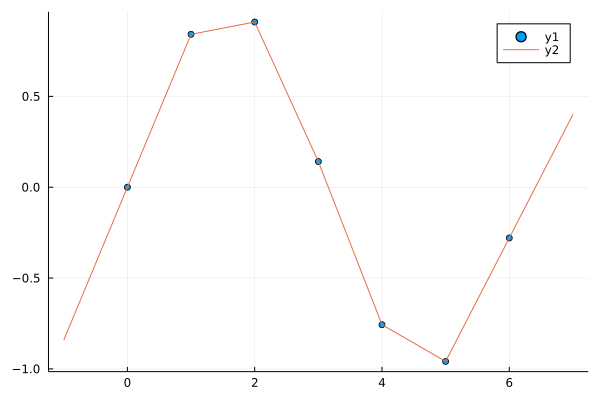

In [10]:
xs=0:6
ys=sin.(xs)
extrap_lin = LinearInterpolation(xs, ys, extrapolation_bc = Line())
xs2=-1:7

scatter(xs,ys)
plot!(xs2,extrap_lin.(xs2))

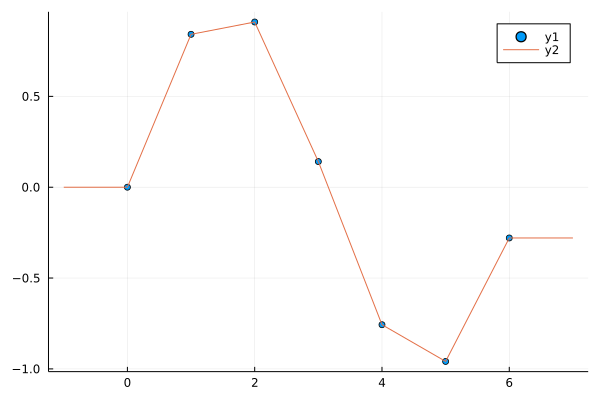

In [11]:
extrap_flat = LinearInterpolation(xs, ys, extrapolation_bc = Flat())

scatter(xs,ys)
plot!(xs2,extrap_flat.(xs2))

Although we can go further in this topic, the main idea is that linear interpolation is very useful in quanittaive economics. Because even though Julia can deals with some abstract functions in a simple manner, this isn't always possible. In such cases it is useful to look at a function as a set of orderd pairs $\{f\}=\{(x,y):y=f(x)\}$. We are often interested in continuos functions at a real interval, the problem is that interval has infinitely many elements of $x$. So we discretize the interval, chosing a countable-finite subset. This is when interpolation comes very handy. It will allows us to work to work with more complicated functions as objects.

### About the grid

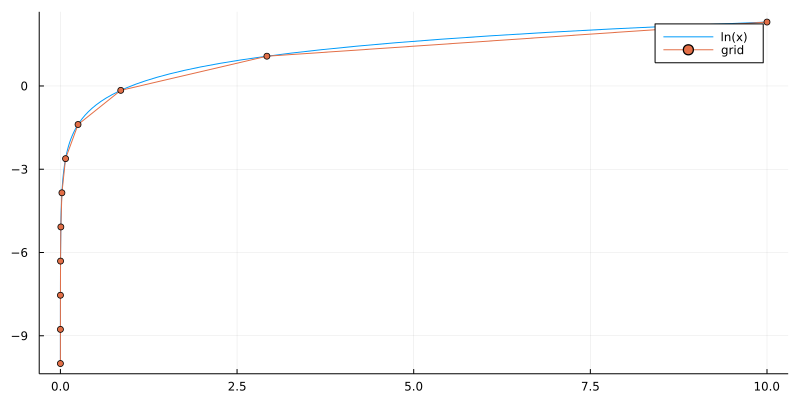

In [12]:
x = exp.(range(-10, log(10), length = 11))   # uneven grid
y = log.(x) # corresponding y points

z = range(exp(-10),10, length = 11 )

interp = LinearInterpolation(x, y)

xf = exp.(range(-10,  log(10), length = 100))  # finer grid

plot(xf, log.(xf), label = "ln(x)")
plot!(x, y, label = "grid", markershape = :circle, markersize = 4, size = (800, 400))

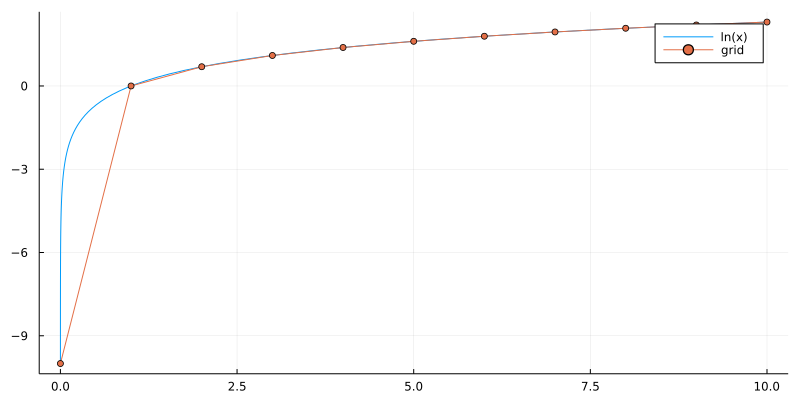

In [13]:
x = range(exp(-10),10, length = 11 )   # even grid
y = log.(x) # corresponding y points

xf = exp.(range(-10,log(10), length = 100))  # finer grid

plot(xf, log.(xf), label = "ln(x)")
plot!(x, y, label = "grid",markershape = :circle, markersize = 4, size = (800, 400))